In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definie initial conditions:
r = 0
k = 0
m = 0
delta = 0
beta = 0
gamma = 0
C_1 = 0
C_2 = 0
C_3 = 0
C_4 = 0

h = 0.1  # Step size
n_steps = 100  # Number of steps

# time points
t = np.arange(0, n_steps * h, h)

# Initialize arrays for A, B, C and Ap
A_values = np.zeros(n_steps)
B_values = np.zeros(n_steps)
C_values = np.zeros(n_steps)
Ap_values = np.zeros(n_steps)

# Define ODEs:
def A(t,y):
    return C_1 * np.exp((r - m - m) * t - (k* C_2) * np.exp(-delta*t)/(delta))

def B(t,y):
    return C_2 * np.exp(-delta*t)

def C(t,y):
    integrand = k * A(t,y) * B(t,y) * np.exp(beta + gamma)*t
    # C_int = odeint(integrand, 0, t, args=(A(t,y), B(t,y), beta, gamma, k))
    C_int = np.trapz(integrand, t)
    return np.exp(-(beta + gamma)*t) + C_int + C_3 * np.exp(-(beta + gamma) * t)

def Ap(t,y):
    integrand = np.exp((r + k)*t) * (m*A(t,y) + gamma*C(t,y))
    # Ap_int = odeint(integrand, 0, t, args=(A(t,y), C(t,y), gamma, r, m, k))
    Ap_int = np.trapz(integrand, t)
    return np.exp(-(r+k)*t) * Ap_int + C_4 * np.exp(-(r+k)*t)


# iterative methods

def rk4_step(func, t, y, h):
    k1 = h * func(t, y)
    k2 = h * func(t + 0.5 * h, y + 0.5 * k1) 
    k3 = h * func(t + 0.5 * h, y + 0.5 * k2) 
    k4 = h * func(t + h, y + k3) 
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Initial values
t0 = 0.0
y0 = 0.0
A_values[0] = A(t[0], 0) 
B_values[0] = B(t[0], 0) 
C_values[0] = C(t[0], 0) 
Ap_values[0] = Ap(t[0], 0)

# Iterate using RK4 

for i in range(1, n_steps): 
    A_values[i] = rk4_step(A, t[i-1], A_values[i-1], h) 
    B_values[i] = rk4_step(B, t[i-1], B_values[i-1], h) 
    C_values[i] = rk4_step(C, t[i-1], C_values[i-1], h) 
    Ap_values[i] = rk4_step(Ap, t[i-1], Ap_values[i-1], h)

# plot results
plt.plot(t, A_values, label='A(t)') 
plt.plot(t, B_values, label='B(t)') 
plt.plot(t, C_values, label='C(t)') 
plt.plot(t, Ap_values, label='Ap(t)') 
plt.xlabel('Time t') 
plt.ylabel('Values') 
plt.legend() 
plt.title('RK4 Approximation of Functions A, B, C, and Ap') 
plt.grid(True)
plt.show()

C:\Users\Guang Hua\AppData\Local\Temp\ipykernel_7740\1166568603.py:31: RuntimeWarning: invalid value encountered in scalar divide
  return C_1 * np.exp((r - m - m) * t - (k* C_2) * np.exp(-delta*t)/(delta))


ValueError: diff requires input that is at least one dimensional

C:\Users\Guang Hua\AppData\Local\Temp\ipykernel_7740\3763668739.py:54: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  C_integral[i] = np.trapz(C_integrand(t[:i+1], A_values[:i+1], B_values[:i+1]), t[:i+1])
C:\Users\Guang Hua\AppData\Local\Temp\ipykernel_7740\3763668739.py:63: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Ap_integral[i] = np.trapz(Ap_integrand(t[:i+1], A_values[:i+1], C_values[:i+1]), t[:i+1])


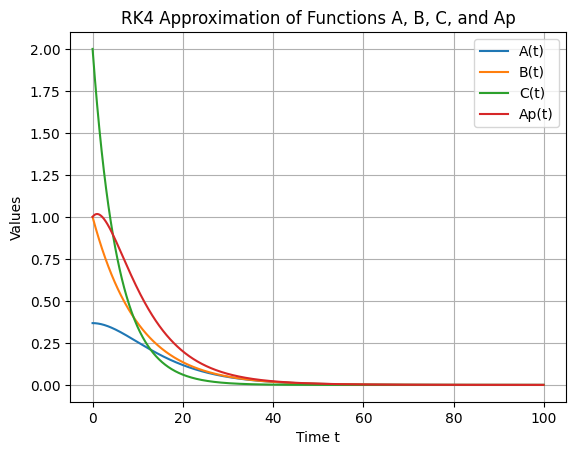

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define initial conditions
r = 0.1
k = 0.1
m = 0.1
delta = 0.1
beta = 0.1
gamma = 0.1
C_1 = 1.0
C_2 = 1.0
C_3 = 1.0
C_4 = 1.0

h = 0.1  # Step size
n_steps = 1000  # Number of steps

# Time points
t = np.arange(0, n_steps * h, h)

# Initialize arrays for A, B, C, and Ap
A_values = np.zeros(n_steps)
B_values = np.zeros(n_steps)
C_values = np.zeros(n_steps)
Ap_values = np.zeros(n_steps)

# Define the ODE functions
def A(t):
    return C_1 * np.exp((r - 2 * m) * t - (k * C_2) * np.exp(-delta * t) / delta)

def B(t):
    return C_2 * np.exp(-delta * t)

# RK4 scheme
def rk4_step(func, t, y, h):
    k1 = h * func(t)
    k2 = h * func(t + 0.5 * h)
    k3 = h * func(t + 0.5 * h)
    k4 = h * func(t + h)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Compute A and B values
for i in range(n_steps):
    A_values[i] = A(t[i])
    B_values[i] = B(t[i])

# Integrate C(t) and Ap(t) separately using trapezoidal rule
def C_integrand(t, A_values, B_values):
    return k * A_values * B_values * np.exp((beta + gamma) * t)

C_integral = np.zeros(n_steps)
for i in range(1, n_steps):
    C_integral[i] = np.trapz(C_integrand(t[:i+1], A_values[:i+1], B_values[:i+1]), t[:i+1])

C_values = np.exp(-(beta + gamma) * t) * (1 + C_integral) + C_3 * np.exp(-(beta + gamma) * t)

def Ap_integrand(t, A_values, C_values):
    return np.exp((r + k) * t) * (m * A_values + gamma * C_values)

Ap_integral = np.zeros(n_steps)
for i in range(1, n_steps):
    Ap_integral[i] = np.trapz(Ap_integrand(t[:i+1], A_values[:i+1], C_values[:i+1]), t[:i+1])

Ap_values = np.exp(-(r + k) * t) * Ap_integral + C_4 * np.exp(-(r + k) * t)

# Plot results
plt.plot(t, A_values, label='A(t)')
plt.plot(t, B_values, label='B(t)')
plt.plot(t, C_values, label='C(t)')
plt.plot(t, Ap_values, label='Ap(t)')
plt.xlabel('Time t')
plt.ylabel('Values')
plt.legend()
plt.title('RK4 Approximation of Functions A, B, C, and Ap')
plt.grid(True)
plt.show()
